# DataFrame Manipulation with `pandas`

`pandas` stands for "Python Data Analysis".  
`pandas` should not be used to manipulate huge datasets due to the fact that it uses the RAM memory to operate. 
That being said, `pandas` is a library/package that allows you to work with `DataFrames` that are multidimentional arrays that are easy to work with and have labels for rows and columns. 
At the core of the ```pandas``` library are two fundamental data structures/objects:
1. [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)
2. [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

A **```Series```** object stores single-column data along with an **index**. An index is just a way of "numbering" the ```Series``` object.

A **```DataFrame```** object is a two-dimensional tabular data structure with labeled axes. 

## Loading Data into ```pandas```

The most common daty type is a CSV file. This is a plane text that is ussually separated with comas but can also be separated with other characters such as semicolons or tabs.
For example:  



Animal,Type,Colour  
Cow,Farm,White  
Cat,House,Black  
Koala,Wildlife,Grey  


~~~python
import pandas as pd
pd.read_csv("path/to/file.csv")
~~~

In [14]:
import pandas as pd
df = pd.read_csv("Data/watches.csv")

### Visualising the DataFrame

We can check the first rows using [**`.head()`**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) and see the last ones with [**`.tail()`**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html):

In [15]:
df.head()

,model,store,condition,engagement,price
0,Caracal,Watches unlimited,New,77.848101,489.0
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5
3,Lightning bolt,Super deals,Like new,78.987342,501.0
4,Sand,Super deals,Good,80.126582,502.5


### Accesing to a sigle column

In [16]:
df['model']

0            Caracal
1            Caracal
2            Caracal
3     Lightning bolt
4               Sand
           ...      
70    Lightning bolt
71              Sand
72    Lightning bolt
73              Sand
74             Tempo
Name: model, Length: 75, dtype: object

### Accesing to a multiple columns

In [17]:
df[["model", "store", "condition"]]


,model,store,condition
0,Caracal,Watches unlimited,New
1,Caracal,National traders,Like new
2,Caracal,National traders,Good
3,Lightning bolt,Super deals,Like new
4,Sand,Super deals,Good
...,...,...,...
70,Lightning bolt,National traders,Very Good
71,Sand,National traders,Good
72,Lightning bolt,Watches unlimited,Fair
73,Sand,Super deals,Like new


### Indexing

By default pandas gives an index from 0 to the rows, but one can change that and use some factor of categorical (sometimes numerical) columns as indexes or group of indexes.

In [18]:
df.set_index(["model", "store", "condition"])   # this only shows but doesn' store anything.

engagement   price
model          store             condition                    
Caracal        Watches unlimited New         77.848101   489.0
               National traders  Like new    75.696203   489.0
                                 Good        72.025316   490.5
Lightning bolt Super deals       Like new    78.987342   501.0
Sand           Super deals       Good        80.126582   502.5
...                                                ...     ...
Lightning bolt National traders  Very Good   80.379747  4239.0
Sand           National traders  Good        80.506329  4282.5
Lightning bolt Watches unlimited Fair        67.088608  4284.0
Sand           Super deals       Like new    79.493671   835.5
Tempo          Watches unlimited Good        82.405063  4308.0

[75 rows x 2 columns]

### Getting rows

In [19]:
df.loc[1:3]    #Always for explicit index

,model,store,condition,engagement,price
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5
3,Lightning bolt,Super deals,Like new,78.987342,501.0


In [20]:
df.iloc[1:3]           #Always for implicit index

,model,store,condition,engagement,price
1,Caracal,National traders,Like new,75.696203,489.0
2,Caracal,National traders,Good,72.025316,490.5


In [21]:
df[2:10]   # we can also extract rows this way

,model,store,condition,engagement,price
2,Caracal,National traders,Good,72.025316,490.5
3,Lightning bolt,Super deals,Like new,78.987342,501.0
4,Sand,Super deals,Good,80.126582,502.5
5,Sand,National traders,Very Good,79.493671,504.0
6,Lightning bolt,Watches unlimited,Very Good,78.860759,504.0
7,Clepsydra,National traders,Very Good,78.354430,505.5
8,Caracal,Super deals,Fair,82.405063,505.5
9,Sand,Watches unlimited,New,79.493671,510.0


In [22]:
#we can filter by giving a indication
df[df.price > 4000].tail()

,model,store,condition,engagement,price
69,Sand,Watches unlimited,Good,81.012658,4233.0
70,Lightning bolt,National traders,Very Good,80.379747,4239.0
71,Sand,National traders,Good,80.506329,4282.5
72,Lightning bolt,Watches unlimited,Fair,67.088608,4284.0
74,Tempo,Watches unlimited,Good,82.405063,4308.0


### Displaying the index

In [23]:
df.index

RangeIndex(start=0, stop=75, step=1)

### Displaying the name of the variables

In [24]:
df.columns

Index(['model', 'store', 'condition', 'engagement', 'price'], dtype='object')

### Displaying the shape of the DataFrame

In [25]:
df.shape       #first name is the numbers of rows and the second is the number of columns.

(75, 5)

### Displaying the info of the variables of the DataFrame

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model       75 non-null     object 
 1   store       75 non-null     object 
 2   condition   75 non-null     object 
 3   engagement  75 non-null     float64
 4   price       75 non-null     float64
dtypes: float64(2), object(3)
memory usage: 3.1+ KB


## Grouping the Data

Groupping is a common task in Data Science. You can group your data and then display some interesting statistical values of the groups you have created. For example groupping by sex and display the count of how many men and women there are. 
Somo of the functions you can apply are: 
 
-   **count()**	: Returns count for each group
-   **size()**	: Returns size for each group
-   **sum()**	: Returns total sum for each group
-   **mean()**	: Returns mean for each group. Same as average()
-   **average()**	: Returns average for each group. Same as mean()
-   **std()**	: Returns standard deviation for each group
-   **var()**	: Return var for each group
-   **sem()**	: Standard error of the mean of groups
-   **describe()**	: Returns different statistics
-   **min()**	: Returns minimum value for each group
-   **max()**	: Returns maximum value for each group
-   **first()**	: Returns first value for each group
-   **last()**	: Returns last value for each group
-   **nth()**	: Returns nth value for each group

In [27]:
groups = df.groupby(["model", "condition"]) # Grouping by
groups["price"].mean() # You first slice using ["price"] and then call the mean function on the grouped Series
# The object here is a Grouped DataFrame

model           condition
Caracal         Fair         2949.5
                Good         1744.0
                Like new      508.0
                New          1818.5
                Very Good    1832.5
Clepsydra       Fair         4151.5
                Good          604.0
                Like new     1934.0
                New          4162.5
                Very Good    1737.0
Lightning bolt  Fair         4235.5
                Good          655.0
                Like new     1739.5
                New           652.5
                Very Good    1783.5
Sand            Fair         4207.5
                Good         3006.0
                Like new     1884.5
                New           543.5
                Very Good     520.0
Tempo           Fair         4189.5
                Good         4225.5
                Like new     3039.5
                New          2965.0
                Very Good    1854.5
Name: price, dtype: float64

Another way of using the group_by 

In [28]:
df.groupby(["model",]).agg({'price':['mean','var','min','max']}) # Group_by model and condition un showing the var and mean of the price
# The object here is a actual DataFrame

price                             
                  mean           var    min     max
model                                              
Caracal         1770.5  3.048256e+06  489.0  4207.5
Clepsydra       2517.8  3.299022e+06  505.5  4195.5
Lightning bolt  1813.2  3.129486e+06  501.0  4284.0
Sand            2032.3  3.440414e+06  502.5  4282.5
Tempo           3254.8  2.551717e+06  531.0  4308.0

### Pivoting

Pivoting is symilar to groupby, however the way of displaying the results is differemt. By pivoting we are able to see a variable(s) in columns and another variable(s) in the rows.  

We create pivot tables in `pandas` using the [**`.pivot_table()`**](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) method, with this syntax:

~~~python
pd.pivot_table(my_df, values=["numeric_column"], index=["row_variable"], columns=["column_variable"])
~~~

In [29]:
pd.pivot_table(df, values=["price"], index=["model"], columns=["condition"]) #by default is the mean

price                                   
condition         Fair    Good Like new     New Very Good
model                                                    
Caracal         2949.5  1744.0    508.0  1818.5    1832.5
Clepsydra       4151.5   604.0   1934.0  4162.5    1737.0
Lightning bolt  4235.5   655.0   1739.5   652.5    1783.5
Sand            4207.5  3006.0   1884.5   543.5     520.0
Tempo           4189.5  4225.5   3039.5  2965.0    1854.5

In [30]:
pd.pivot_table(df, values=["price"], index=["model"], columns=["store"],aggfunc='count') 
#we can change to another aggregation function

price                              
store          National traders Super deals Watches unlimited
model                                                        
Caracal                       5           5                 5
Clepsydra                     5           5                 5
Lightning bolt                5           5                 5
Sand                          5           5                 5
Tempo                         5           5                 5

### stack() and unstack()

![Img](https://miro.medium.com/max/1400/1*DYDOif_qBEgtWfFKUDSf0Q.png)

In [31]:
df_index = df.set_index(["model", "store", "condition"])
df_index

engagement   price
model          store             condition                    
Caracal        Watches unlimited New         77.848101   489.0
               National traders  Like new    75.696203   489.0
                                 Good        72.025316   490.5
Lightning bolt Super deals       Like new    78.987342   501.0
Sand           Super deals       Good        80.126582   502.5
...                                                ...     ...
Lightning bolt National traders  Very Good   80.379747  4239.0
Sand           National traders  Good        80.506329  4282.5
Lightning bolt Watches unlimited Fair        67.088608  4284.0
Sand           Super deals       Like new    79.493671   835.5
Tempo          Watches unlimited Good        82.405063  4308.0

[75 rows x 2 columns]

In [32]:
unstacked = df_index.unstack()   #takes the last colum of indesex and convert it into a row as a title
unstacked

engagement                                   \
condition                              Fair       Good   Like new        New   
model          store                                                           
Caracal        National traders   69.746835  72.025316  75.696203  79.113924   
               Super deals        82.405063  81.139241  76.202532  79.620253   
               Watches unlimited  74.303797  72.784810  77.088608  77.848101   
Clepsydra      National traders   83.164557  80.759494  77.848101  77.468354   
               Super deals        81.518987  81.012658  77.468354  78.481013   
               Watches unlimited  85.949367  79.873418  79.620253  77.974684   
Lightning bolt National traders   86.202532  80.000000  79.113924  77.974684   
               Super deals        85.189873  80.126582  78.987342  78.481013   
               Watches unlimited  67.088608  80.886076  74.430380  77.468354   
Sand           National traders   83.291139  80.506329  75.063291  78.734177   
               Super deals        82.278481  80.126582  79.493671  77.341772   
               Watches unlimited  83.164557  81.012658  78.354430  79.493671   
Tempo          National traders   74.430380  82.405063  78.227848  77.974684   
               Super deals        74.683544  75.569620  78.101266  78.354430   
               Watches unlimited  69.746835  82.405063  77.088608  78.354430   

                                              price                           \
condition                         Very Good    Fair    Good Like new     New   
model          store                                                           
Caracal        National traders   79.240506  4135.5   490.5    489.0  4135.5   
               Super deals        80.759494   505.5   603.0    517.5   831.0   
               Watches unlimited  78.987342  4207.5  4138.5    517.5   489.0   
Clepsydra      National traders   78.354430  4144.5   604.5   4140.0  4147.5   
               Super deals        77.215190  4144.5   603.0    831.0  4144.5   
               Watches unlimited  80.632911  4165.5   604.5    831.0  4195.5   
Lightning bolt National traders   80.379747  4216.5   607.5    532.5   831.0   
               Super deals        79.240506  4206.0   526.5    501.0   522.0   
               Watches unlimited  78.860759  4284.0   831.0   4185.0   604.5   
Sand           National traders   79.493671  4183.5  4282.5    607.5   516.0   
               Super deals        79.367089  4222.5   502.5    835.5   604.5   
               Watches unlimited  75.189873  4216.5  4233.0   4210.5   510.0   
Tempo          National traders   76.455696  4195.5  4204.5    829.5  4140.0   
               Super deals        75.822785  4200.0  4164.0   4140.0   606.0   
               Watches unlimited  80.126582  4173.0  4308.0   4149.0  4149.0   

                                            
condition                        Very Good  
model          store                        
Caracal        National traders      831.0  
               Super deals           528.0  
               Watches unlimited    4138.5  
Clepsydra      National traders      505.5  
               Super deals           529.5  
               Watches unlimited    4176.0  
Lightning bolt National traders     4239.0  
               Super deals           607.5  
               Watches unlimited     504.0  
Sand           National traders      504.0  
               Super deals           526.5  
               Watches unlimited     529.5  
Tempo          National traders      531.0  
               Super deals          4203.0  
               Watches unlimited     829.5

In [33]:
unstacked.stack()

engagement   price
model   store             condition                    
Caracal National traders  Fair        69.746835  4135.5
                          Good        72.025316   490.5
                          Like new    75.696203   489.0
                          New         79.113924  4135.5
                          Very Good   79.240506   831.0
...                                         ...     ...
Tempo   Watches unlimited Fair        69.746835  4173.0
                          Good        82.405063  4308.0
                          Like new    77.088608  4149.0
                          New         78.354430  4149.0
                          Very Good   80.126582   829.5

[75 rows x 2 columns]

# Practicing

In [34]:
titanic = pd.read_csv('Data/titanic.csv')


In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# Average age of men and female 
titanic.groupby(['Sex']).agg({'Age':'mean'})

,Age
Sex,
female,27.915709
male,30.726645


In [37]:
# Average age of men and female that survived
titanic.groupby(['Sex','Survived']).agg({'Age':'mean'})

Age
Sex    Survived           
female 0         25.046875
       1         28.847716
male   0         31.618056
       1         27.276022

In [38]:
# Average age of men and female that survived with Puvot Table
pd.pivot_table(titanic,values = ['Age'] , index = ['Sex'] , columns= ['Survived'])

Age           
Survived          0          1
Sex                           
female    25.046875  28.847716
male      31.618056  27.276022

In [39]:
# how many men and female survived with pivot_table
pd.pivot_table(titanic,values = ['Age'] , index = ['Sex'] , columns= ['Survived'],aggfunc="count")

Age     
Survived    0    1
Sex               
female     64  197
male      360   93

In [40]:
# how many men and female survived with groupby
titanic.groupby(['Sex','Survived']).agg({'Age':'count'})

Age
Sex    Survived     
female 0          64
       1         197
male   0         360
       1          93

In [41]:
# average age of male and femalo according to the class they travled in with groupby
titanic.groupby(['Sex','Survived','Pclass']).agg({"Age":'mean'})

Age
Sex    Survived Pclass           
female 0        1       25.666667
                2       36.000000
                3       23.818182
       1        1       34.939024
                2       28.080882
                3       19.329787
male   0        1       44.581967
                2       33.369048
                3       27.255814
       1        1       36.248000
                2       16.022000
                3       22.274211

In [42]:
# average age of male and femalo according to the class they travled in with pivot_table
pd.pivot_table(titanic , values= "Age" , columns= ['Survived'] , index=['Sex','Pclass'],aggfunc='mean')

Survived               0          1
Sex    Pclass                      
female 1       25.666667  34.939024
       2       36.000000  28.080882
       3       23.818182  19.329787
male   1       44.581967  36.248000
       2       33.369048  16.022000
       3       27.255814  22.274211

In [43]:
# Average ticket price of the ones who survived compared to the ones that didn't with groupby
titanic.groupby(['Survived']).agg({'Fare':'mean'})

,Fare
Survived,
0,22.117887
1,48.395408


In [44]:
# Average ticket price of the ones who survived compared to the ones that didn't with pivot_table
pd.pivot_table(data=titanic, values= 'Fare' , index='Survived',aggfunc='mean')

,Fare
Survived,
0,22.117887
1,48.395408


In [45]:
#mean of the price of the ticket accordin to the class with pivot_table
pd.pivot_table(titanic, values= 'Fare' , index= 'Pclass', aggfunc = 'mean')

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [46]:
#mean of the price of the ticket accordin to the class with groupby
titanic.groupby(['Pclass']).agg({'Fare':'mean'})

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [47]:
#mean and count of the price of the ticket accordin to the class with groupby
titanic.groupby(['Pclass','Survived']).agg({'Fare':['mean','count']})

Fare      
                      mean count
Pclass Survived                 
1      0         64.684007    80
       1         95.608029   136
2      0         19.412328    97
       1         22.055700    87
3      0         13.669364   372
       1         13.694887   119

In [48]:
#mean and count of the price of the ticket accordin to the class with pivot_table
pd.pivot_table(titanic, values= 'Fare' , index= 'Pclass', columns= 'Survived' , aggfunc = ['mean','count'])

mean            count     
Survived          0          1     0    1
Pclass                                   
1         64.684007  95.608029    80  136
2         19.412328  22.055700    97   87
3         13.669364  13.694887   372  119

# More of ``Pandas``
## methods and functions

We will work with a dataset of global electricity. Questions to solve are:

1. How much power is produced?
2. How much power is consumed?
3. How much power is imported and exported?
4. How much of this power is renewable?

In [49]:
import pandas as pd

In [50]:
df = pd.read_csv('Data/all_energy_statistics.csv')

In [51]:
df

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
...,...,...,...,...,...,...,...
1189477,Viet Nam,Electricity - total wind production,2012,"Kilowatt-hours, million",92.0,1.0,wind_electricity
1189478,Viet Nam,Electricity - total wind production,2011,"Kilowatt-hours, million",87.0,NaN,wind_electricity
1189479,Viet Nam,Electricity - total wind production,2010,"Kilowatt-hours, million",50.0,NaN,wind_electricity
1189480,Viet Nam,Electricity - total wind production,2009,"Kilowatt-hours, million",10.0,NaN,wind_electricity


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


## How many unique values are in certain Serie

In [53]:
df['country_or_area'].drop_duplicates()

0                                          Austria
2                                          Belgium
8                                          Czechia
10                                         Finland
26                                          France
                            ...                   
212765                                      Tuvalu
212938                    United States Virgin Is.
213088                       Wallis and Futuna Is.
362966    Commonwealth of Independent States (CIS)
399113                         Antarctic Fisheries
Name: country_or_area, Length: 243, dtype: object

In [54]:
df['category'].drop_duplicates()

0                                   additives_and_oxygenates
3018                                            animal_waste
4940                                              anthracite
9834                                       aviation_gasoline
28005                                                bagasse
                                 ...                        
1037653                                    total_electricity
1171569                                total_refinery_output
1177352                                              uranium
1178036    white_spirit_and_special_boiling_point_industr...
1188115                                     wind_electricity
Name: category, Length: 71, dtype: object

## Description of the **numerical** variables

In [55]:
df.describe() 

,year,quantity,quantity_footnotes
count,1.189482e+06,1.189482e+06,163946.0
mean,2.002852e+03,1.842648e+05,1.0
std,7.167345e+00,1.585663e+07,0.0
min,1.990000e+03,-8.643480e+05,1.0
25%,1.997000e+03,1.400000e+01,1.0
50%,2.003000e+03,1.890000e+02,1.0
75%,2.009000e+03,2.265000e+03,1.0
max,2.014000e+03,6.680329e+09,1.0


## Description of the object variables

In [56]:
df.describe(include=['O'])        # includes the columns object type

,country_or_area,commodity_transaction,unit,category
count,1189482,1189482,1189482,1189482
unique,243,2452,6,71
top,Germany,From combustible fuels – Main activity,"Metric tons, thousand",total_electricity
freq,20422,6601,759859,133916


## `min()` and `max()` functions

In [57]:
print(df['year'].min())
print(df['year'].max())

1990
2014


## changine the `str` columns

In [58]:
df['commodity_transaction'].str.lower()

0           additives and oxygenates - exports
1           additives and oxygenates - exports
2           additives and oxygenates - exports
3           additives and oxygenates - exports
4           additives and oxygenates - exports
                          ...                 
1189477    electricity - total wind production
1189478    electricity - total wind production
1189479    electricity - total wind production
1189480    electricity - total wind production
1189481    electricity - total wind production
Name: commodity_transaction, Length: 1189482, dtype: object

# Drop duplicated rows

In [59]:
df["commodity_transaction"].drop_duplicates().str.count("-")
#drop_cuplicate removes the duplicated rows

0          1
149        1
617        1
906        1
1000       1
          ..
1186132    1
1187689    1
1187961    1
1188038    1
1188115    1
Name: commodity_transaction, Length: 2452, dtype: int64

# count of strings patterns

In [60]:
df["commodity_transaction"].str.count("-")

0          1
1          1
2          1
3          1
4          1
          ..
1189477    1
1189478    1
1189479    1
1189480    1
1189481    1
Name: commodity_transaction, Length: 1189482, dtype: int64

# What is the frequency of each category in a Serie

In [61]:
df["commodity_transaction"].value_counts()

From combustible fuels – Main activity                 6601
Electricity - Gross demand                             5532
Electricity - net production                           5523
Electricity - total production, main activity          5523
Electricity - Gross production                         5523
                                                       ... 
Biodiesel - Net transfers                                 1
Lubricants - Consumption by wood and wood products        1
Refinery Gas - Consumption by mining and quarrying        1
Refinery Gas - Consumption by transport equipment         1
Lignite - Consumption by domestic navigation              1
Name: commodity_transaction, Length: 2452, dtype: int64

Combining all we just saw.  
104 values contain the word "Electricity" and 2348 don't

In [62]:
df['commodity_transaction'].drop_duplicates().str.count('Electricity').value_counts()

0    2348
1     104
Name: commodity_transaction, dtype: int64

next chunk counts the  

In [63]:
df['commodity_transaction'][df['commodity_transaction'].str.count('–')==0].drop_duplicates()  

0                         Additives and Oxygenates - Exports
149                       Additives and Oxygenates - Imports
617                    Additives and Oxygenates - Production
906        Additives and Oxygenates - Receipts from other...
1000                Additives and Oxygenates - Stock changes
                                 ...                        
1186132    White spirit and special boiling point industr...
1187689    White spirit and special boiling point industr...
1187961    White spirit and special boiling point industr...
1188038    White spirit and special boiling point industr...
1188115                  Electricity - total wind production
Name: commodity_transaction, Length: 2397, dtype: object

### compoused condition (filter)

In [64]:
df['commodity_transaction'][(df['commodity_transaction'].str.count('–')==0) & (df['commodity_transaction'].str.count('-')==0)].drop_duplicates()

1171569        Total refinery output
1174459    Total refinery throughput
Name: commodity_transaction, dtype: object

### Replace values

In [65]:
df['clean_transaction'] = df["commodity_transaction"].str.replace("-" , "–").str.lower()

In [66]:
df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category,clean_transaction
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates,additives and oxygenates – exports
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates,additives and oxygenates – exports
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates,additives and oxygenates – exports
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates,additives and oxygenates – exports
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates,additives and oxygenates – exports


## Extracting rows

In [67]:
df["clean_transaction"][df["clean_transaction"].str.contains("import")].drop_duplicates()

149                       additives and oxygenates – imports
7831                                    anthracite – imports
19202                            aviation gasoline – imports
43469                                    biodiesel – imports
50278                                     biogases – imports
58332                                  biogasoline – imports
65415                                      bitumen – imports
100684                       brown coal briquettes – imports
113746                                  brown coal – imports
140375                                    charcoal – imports
151396                                    coal tar – imports
166623                                 coking coal – imports
174196                      conventional crude oil – imports
255441                                      ethane – imports
297781                                    fuel oil – imports
362577                                    fuelwood – imports
384982                  

In [68]:
df['commodity_transaction'].isin(keep_values)

NameError: name 'keep_values' is not defined

In [ ]:
df[df["clean_transaction"].str.contains('electricity – imports')]

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category,clean_transaction
1108326,Afghanistan,Electricity - imports,2014,"Kilowatt-hours, million",3710.8,NaN,total_electricity,electricity – imports
1108327,Afghanistan,Electricity - imports,2013,"Kilowatt-hours, million",3615.2,NaN,total_electricity,electricity – imports
1108328,Afghanistan,Electricity - imports,2012,"Kilowatt-hours, million",3071.0,NaN,total_electricity,electricity – imports
1108329,Afghanistan,Electricity - imports,2011,"Kilowatt-hours, million",2732.0,NaN,total_electricity,electricity – imports
1108330,Afghanistan,Electricity - imports,2010,"Kilowatt-hours, million",1867.0,NaN,total_electricity,electricity – imports
...,...,...,...,...,...,...,...,...
1110998,Zimbabwe,Electricity - imports,1994,"Kilowatt-hours, million",2073.0,NaN,total_electricity,electricity – imports
1110999,Zimbabwe,Electricity - imports,1993,"Kilowatt-hours, million",1921.0,NaN,total_electricity,electricity – imports
1111000,Zimbabwe,Electricity - imports,1992,"Kilowatt-hours, million",1201.0,NaN,total_electricity,electricity – imports
1111001,Zimbabwe,Electricity - imports,1991,"Kilowatt-hours, million",1838.0,NaN,total_electricity,electricity – imports


## pivoting factor values

In [ ]:
keep_values =  [
        "Electricity - Gross demand",
        "Electricity - Gross production",
        "Electricity - imports",
        "Electricity - exports",
        "Electricity - total hydro production",
        "Electricity - total wind production",
        "Electricity - total solar production",
        "Electricity - total geothermal production",
        "Electricity - total tide, wave production",
]


In [ ]:
df_filtered = df[df['commodity_transaction'].isin(keep_values)]

In [ ]:
df_filtered.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category,clean_transaction
490912,Australia,Electricity - total geothermal production,2014,"Kilowatt-hours, million",1.0,NaN,geothermal,electricity – total geothermal production
490913,Australia,Electricity - total geothermal production,2013,"Kilowatt-hours, million",1.0,NaN,geothermal,electricity – total geothermal production
490914,Australia,Electricity - total geothermal production,2012,"Kilowatt-hours, million",1.0,NaN,geothermal,electricity – total geothermal production
490915,Australia,Electricity - total geothermal production,2011,"Kilowatt-hours, million",1.0,NaN,geothermal,electricity – total geothermal production
490916,Australia,Electricity - total geothermal production,2010,"Kilowatt-hours, million",1.0,NaN,geothermal,electricity – total geothermal production


In [ ]:
df_countries = pd.pivot_table(df_filtered,
values = "quantity",
index = ["country_or_area" , "year"],
columns= "commodity_transaction")
df_countries

commodity_transaction  Electricity - Gross demand  \
country_or_area year                                
Afghanistan     1990                       1055.0   
                1991                        945.0   
                1992                        789.0   
                1993                        780.0   
                1994                        770.0   
...                                           ...   
Zimbabwe        2010                       9317.3   
                2011                       9645.5   
                2012                       9425.2   
                2013                       9919.7   
                2014                       9740.0   

commodity_transaction  Electricity - Gross production  Electricity - exports  \
country_or_area year                                                           
Afghanistan     1990                           1128.0                    NaN   
                1991                           1015.0                    NaN   
                1992                            703.0                    NaN   
                1993                            695.0                    NaN   
                1994                            687.0                    NaN   
...                                               ...                    ...   
Zimbabwe        2010                           8602.9                  694.4   
                2011                           9177.2                  988.2   
                2012                           9148.6                  700.9   
                2013                           9498.8                 1189.3   
                2014                          10023.0                 1226.0   

commodity_transaction  Electricity - imports  \
country_or_area year                           
Afghanistan     1990                     NaN   
                1991                     NaN   
                1992                   131.0   
                1993                   130.0   
                1994                   128.0   
...                                      ...   
Zimbabwe        2010                  1681.7   
                2011                  1578.7   
                2012                  1076.1   
                2013                  1722.0   
                2014                  1127.0   

commodity_transaction  Electricity - total geothermal production  \
country_or_area year                                               
Afghanistan     1990                                         NaN   
                1991                                         NaN   
                1992                                         NaN   
                1993                                         NaN   
                1994                                         NaN   
...                                                          ...   
Zimbabwe        2010                                         NaN   
                2011                                         NaN   
                2012                                         NaN   
                2013                                         NaN   
                2014                                         NaN   

commodity_transaction  Electricity - total hydro production  \
country_or_area year                                          
Afghanistan     1990                                  764.0   
                1991                                  690.0   
                1992                                  478.0   
                1993                                  475.0   
                1994                                  472.0   
...                                                     ...   
Zimbabwe        2010                                 5762.8   
                2011                                 5201.8   
                2012                                 5387.3   
                2013                                 4981.8   
   

### Redefining the columns names

In [ ]:
df_countries.columns = [
    "demand",
    "production",
    "exports",
    "imports",
    "geothermal",
    "hydro",
    "solar",
    "tide",
    "wind",
]
df_countries

demand  production  exports  imports  geothermal  \
country_or_area year                                                     
Afghanistan     1990  1055.0      1128.0      NaN      NaN         NaN   
                1991   945.0      1015.0      NaN      NaN         NaN   
                1992   789.0       703.0      NaN    131.0         NaN   
                1993   780.0       695.0      NaN    130.0         NaN   
                1994   770.0       687.0      NaN    128.0         NaN   
...                      ...         ...      ...      ...         ...   
Zimbabwe        2010  9317.3      8602.9    694.4   1681.7         NaN   
                2011  9645.5      9177.2    988.2   1578.7         NaN   
                2012  9425.2      9148.6    700.9   1076.1         NaN   
                2013  9919.7      9498.8   1189.3   1722.0         NaN   
                2014  9740.0     10023.0   1226.0   1127.0         NaN   

                       hydro  solar  tide  wind  
country_or_area year                             
Afghanistan     1990   764.0    NaN   NaN   NaN  
                1991   690.0    NaN   NaN   NaN  
                1992   478.0    NaN   NaN   NaN  
                1993   475.0    NaN   NaN   NaN  
                1994   472.0    NaN   NaN   NaN  
...                      ...    ...   ...   ...  
Zimbabwe        2010  5762.8    NaN   NaN   NaN  
                2011  5201.8    NaN   NaN   NaN  
                2012  5387.3    NaN   NaN   NaN  
                2013  4981.8    NaN   NaN   NaN  
                2014  5431.0    NaN   NaN   NaN  

[5532 rows x 9 columns]

In [ ]:
df_countries.sort_values(by='production',ascending=False)

demand  production  exports  imports  geothermal  \
country_or_area year                                                        
China           2014  5219096.0   5649583.4  18158.0   6750.0         NaN   
                2013  5016127.0   5431637.4  18669.0   7438.0         NaN   
                2012  4609729.0   4987553.0  17653.0   6874.0         NaN   
                2011  4319132.0   4713019.0  19307.0   6562.0         NaN   
United States   2010  4153664.0   4378422.0  19107.0  45083.0     17577.0   
...                         ...         ...      ...      ...         ...   
Lesotho         1994      310.0         NaN      NaN    310.0         NaN   
                1995      324.0         NaN      NaN    324.0         NaN   
                1996      335.0         NaN      NaN    335.0         NaN   
                1997      395.0         NaN      NaN    395.0         NaN   
                1998      385.0         NaN      NaN    385.0         NaN   

                          hydro    solar  tide      wind  
country_or_area year                                      
China           2014  1064337.0  15189.0   NaN  156078.0  
                2013   920291.0   5564.0   NaN  141197.0  
                2012   872107.0      NaN   NaN   95978.0  
                2011   698945.0      NaN   NaN   70331.0  
United States   2010   286333.0   3934.0   NaN   95148.0  
...                         ...      ...   ...       ...  
Lesotho         1994        NaN      NaN   NaN       NaN  
                1995        NaN      NaN   NaN       NaN  
                1996        NaN      NaN   NaN       NaN  
                1997        NaN      NaN   NaN       NaN  
                1998        NaN      NaN   NaN       NaN  

[5532 rows x 9 columns]

# Delete explicit indexes

In [ ]:
df_countries = df_countries.reset_index()

In [ ]:
df_countries['year'].value_counts()

2014    229
2013    229
2012    229
2011    226
2010    226
2009    226
2008    226
2007    226
2006    225
2005    225
2003    224
2004    224
2002    224
2001    221
2000    220
1999    220
1998    220
1997    220
1996    220
1995    220
1994    220
1993    219
1992    219
1991    197
1990    197
Name: year, dtype: int64

# Fill NaN with 0

In [ ]:
df_countries = df_countries.fillna(0)
df_countries

,country_or_area,year,demand,production,exports,imports,geothermal,hydro,solar,tide,wind
0,Afghanistan,1990,1055.0,1128.0,0.0,0.0,0.0,764.0,0.0,0.0,0.0
1,Afghanistan,1991,945.0,1015.0,0.0,0.0,0.0,690.0,0.0,0.0,0.0
2,Afghanistan,1992,789.0,703.0,0.0,131.0,0.0,478.0,0.0,0.0,0.0
3,Afghanistan,1993,780.0,695.0,0.0,130.0,0.0,475.0,0.0,0.0,0.0
4,Afghanistan,1994,770.0,687.0,0.0,128.0,0.0,472.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5527,Zimbabwe,2010,9317.3,8602.9,694.4,1681.7,0.0,5762.8,0.0,0.0,0.0
5528,Zimbabwe,2011,9645.5,9177.2,988.2,1578.7,0.0,5201.8,0.0,0.0,0.0
5529,Zimbabwe,2012,9425.2,9148.6,700.9,1076.1,0.0,5387.3,0.0,0.0,0.0
5530,Zimbabwe,2013,9919.7,9498.8,1189.3,1722.0,0.0,4981.8,0.0,0.0,0.0


uploading new DF without NaN

In [120]:
import pandas as pd
df_countries = pd.read_csv("Data/df_countries_no_na.csv")

In [121]:
df_countries.head()

,country_or_area,year,demand,production,exports,imports,geothermal,hydro,solar,tide,wind
0,China,2014,5219096.0,5649583.4,18158.0,6750.0,0.0,1064337.0,15189.0,0,156078.0
1,China,2013,5016127.0,5431637.4,18669.0,7438.0,0.0,920291.0,5564.0,0,141197.0
2,China,2012,4609729.0,4987553.0,17653.0,6874.0,0.0,872107.0,0.0,0,95978.0
3,China,2011,4319132.0,4713019.0,19307.0,6562.0,0.0,698945.0,0.0,0,70331.0
4,United States,2010,4153664.0,4378422.0,19107.0,45083.0,17577.0,286333.0,3934.0,0,95148.0


# Sum values of different columns


In [122]:
df_countries['renewable_total'] = df_countries[['hydro', 'wind','solar','geothermal','tide']].sum(axis="columns")
df_countries['renewable_percent'] = df_countries['renewable_total'] / df_countries['production']

In [123]:
df_countries

,country_or_area,year,demand,production,exports,imports,geothermal,hydro,solar,tide,wind,renewable_total,renewable_percent
0,China,2014,5219096.0,5649583.4,18158.0,6750.0,0.0,1064337.0,15189.0,0,156078.0,1235604.0,0.218707
1,China,2013,5016127.0,5431637.4,18669.0,7438.0,0.0,920291.0,5564.0,0,141197.0,1067052.0,0.196451
2,China,2012,4609729.0,4987553.0,17653.0,6874.0,0.0,872107.0,0.0,0,95978.0,968085.0,0.194100
3,China,2011,4319132.0,4713019.0,19307.0,6562.0,0.0,698945.0,0.0,0,70331.0,769276.0,0.163224
4,United States,2010,4153664.0,4378422.0,19107.0,45083.0,17577.0,286333.0,3934.0,0,95148.0,402992.0,0.092040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527,Lesotho,1994,310.0,0.0,0.0,310.0,0.0,0.0,0.0,0,0.0,0.0,NaN
5528,Lesotho,1995,324.0,0.0,0.0,324.0,0.0,0.0,0.0,0,0.0,0.0,NaN
5529,Lesotho,1996,335.0,0.0,0.0,335.0,0.0,0.0,0.0,0,0.0,0.0,NaN
5530,Lesotho,1997,395.0,0.0,0.0,395.0,0.0,0.0,0.0,0,0.0,0.0,NaN


In [124]:
df_countries[df_countries['year']==2014].sort_values(by='renewable_percent',ascending=False).head(5)

,country_or_area,year,demand,production,exports,imports,geothermal,hydro,solar,tide,wind,renewable_total,renewable_percent
2655,Albania,2014,7791.43,4724.43,183.45,3250.45,0.0,4724.43,0.0,0,0.0,4724.43,1.000000
3924,Lesotho,2014,783.48,515.20,2.92,271.20,0.0,515.20,0.0,0,0.0,515.20,1.000000
2357,Bhutan,2014,2085.46,7003.86,4991.90,187.37,0.0,7003.36,0.0,0,0.0,7003.36,0.999929
1008,Paraguay,2014,13432.00,55282.30,41400.10,0.00,0.0,55276.40,0.0,0,0.0,55276.40,0.999893
1704,Iceland,2014,17475.00,18122.00,0.00,0.00,5238.0,12873.00,0.0,0,8.0,18119.00,0.999834


In [125]:
# get only the top producers and redo the analysis
threshold = df_countries['production'].quantile(0.9)
df_countries[(df_countries.production > threshold) & (df_countries.year == 2014)].sort_values(by='renewable_percent',ascending=False).head(5)

,country_or_area,year,demand,production,exports,imports,geothermal,hydro,solar,tide,wind,renewable_total,renewable_percent
536,Norway,2014,124139.0,142327.0,21932.0,6347.0,0.0,136636.0,0.0,0,2216.0,138852.0,0.975584
138,Brazil,2014,615629.0,590541.0,3.0,33778.0,0.0,373439.0,16.0,0,12211.0,385666.0,0.653072
111,Canada,2014,591137.0,656225.0,58421.0,12808.0,0.0,382574.0,1756.0,16,22538.0,406884.0,0.620037
493,Sweden,2014,132375.0,153662.0,29475.0,13852.0,0.0,63872.0,47.0,0,11234.0,75153.0,0.489080
522,Viet Nam,2014,141136.0,145730.0,880.0,2053.0,0.0,61480.0,0.0,0,300.0,61780.0,0.423935


# de los paises que mas producción tuvieron en el 2014, muestre cuales son los que mayour porcentaje renovable tuvieron 


In [126]:
df_countries[(df_countries.production > threshold) & (df_countries.year == 2014)].sort_values(by='renewable_percent',ascending=True).head(5)

,country_or_area,year,demand,production,exports,imports,geothermal,hydro,solar,tide,wind,renewable_total,renewable_percent
258,Saudi Arabia,2014,304240.0,311806.0,0.0,0.0,0.0,0.0,1.0,0,0.0,1.0,0.000003
170,"Korea, Republic of",2014,523363.0,550933.0,0.0,0.0,0.0,7820.0,2557.0,492,1146.0,12015.0,0.021808
316,South Africa,2014,231445.0,252578.0,13836.0,11177.0,0.0,4082.0,1120.0,0,1070.0,6272.0,0.024832
304,Other Asia,2014,244755.0,260025.0,0.0,0.0,0.0,7439.0,552.0,0,1500.0,9491.0,0.036500
429,Thailand,2014,179330.0,180862.0,2066.0,12260.0,1.0,5540.0,1385.0,0,305.0,7231.0,0.039981


In [127]:
df_countries.sort_values(by="renewable_percent",ascending=False,inplace=True)      #inplace=True allows not to assign everything to the variable again
df_countries

,country_or_area,year,demand,production,exports,imports,geothermal,hydro,solar,tide,wind,renewable_total,renewable_percent
3187,Bhutan,1998,446.0,1801.0,1357.0,8.0,0.0,1801.0,0.0,0,0.0,1801.0,1.0
4042,Lesotho,2004,413.2,403.9,6.1,15.4,0.0,403.9,0.0,0,0.0,403.9,1.0
3123,Bhutan,1996,413.0,1972.0,1560.0,7.0,0.0,1972.0,0.0,0,0.0,1972.0,1.0
3935,Lesotho,2008,576.6,503.4,3.8,77.0,0.0,503.4,0.0,0,0.0,503.4,1.0
3923,Lesotho,2013,798.0,515.3,2.2,284.9,0.0,515.3,0.0,0,0.0,515.3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527,Lesotho,1994,310.0,0.0,0.0,310.0,0.0,0.0,0.0,0,0.0,0.0,NaN
5528,Lesotho,1995,324.0,0.0,0.0,324.0,0.0,0.0,0.0,0,0.0,0.0,NaN
5529,Lesotho,1996,335.0,0.0,0.0,335.0,0.0,0.0,0.0,0,0.0,0.0,NaN
5530,Lesotho,1997,395.0,0.0,0.0,395.0,0.0,0.0,0.0,0,0.0,0.0,NaN


In [129]:
renewable_change = pd.pivot_table(df_countries , values= 'renewable_percent' , index = 'country_or_area' , columns= "year")
renewable_change

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country_or_area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.677305,0.679803,0.679943,0.683453,0.687045,0.690370,0.703704,0.723881,0.744361,0.737226,...,0.740618,0.707558,0.720000,0.686548,0.871766,0.859865,0.824876,0.859100,0.786364,0.853235
Albania,0.876134,0.950693,0.958892,0.951206,0.966180,0.952424,0.966250,0.969907,0.970994,0.979062,...,0.987139,0.983164,0.975560,1.000000,0.999834,0.999888,0.985939,1.000000,1.000000,1.000000
Algeria,0.008383,0.016892,0.010883,0.018182,0.008347,0.009790,0.006294,0.003490,0.004235,0.004056,...,0.016882,0.006189,0.006076,0.007034,0.007948,0.003805,0.009800,0.010837,0.005510,0.003954
American Samoa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007024,0.007031,0.007009
Andorra,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.988235,0.945946,0.750000,0.800508,0.765432,0.887311,0.865132,0.866894,0.887533,0.894322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen Arab Rep. (former),0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Dem. (former)",0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yugoslavia, SFR (former)",0.242374,0.242387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
renewable_change = pd.pivot_table(df_countries , values= 'renewable_percent' , index = 'country_or_area' , columns= "year").reset_index()[['country_or_area',1990,2014]]
renewable_change

year,country_or_area,1990,2014
0,Afghanistan,0.677305,0.853235
1,Albania,0.876134,1.000000
2,Algeria,0.008383,0.003954
3,American Samoa,0.000000,0.007009
4,Andorra,1.000000,0.894322
...,...,...,...
236,Yemen Arab Rep. (former),0.000000,NaN
237,"Yemen, Dem. (former)",0.000000,NaN
238,"Yugoslavia, SFR (former)",0.242374,NaN
239,Zambia,0.994853,0.971630


In [139]:
renewable_change["diff"] = renewable_change[2014] - renewable_change[1990]
renewable_change.sort_values(by="diff",ascending=False)

year,country_or_area,1990,2014,diff
86,Greenland,0.000000,0.683475,0.683475
185,Sierra Leone,0.000000,0.653569,0.653569
75,French Guiana,0.000000,0.605495,0.605495
20,Belize,0.000000,0.507055,0.507055
58,Denmark,0.024555,0.425380,0.400824
...,...,...,...,...
234,Wallis and Futuna Is.,NaN,0.000000,NaN
235,Yemen,NaN,0.000000,NaN
236,Yemen Arab Rep. (former),0.000000,NaN,NaN
237,"Yemen, Dem. (former)",0.000000,NaN,NaN


# `apply()` function in pandas

Execute a function either row by row or column by column 

~~~python
my_serie.apply(my_function)
~~~

In [140]:
def assign_label(value):
    if value <500:
        label = "Less than 500"
    elif value <5000:
        label = "Between 500 and 5,000"
    elif value <50000:
        label = "Between 5,000 and 50,000"
    else:
        label = "50,000 or more"
    return label

In [146]:
assign_label(40000)

'Between 5,000 and 50,000'

In [141]:
df_countries_2014 = df_countries[df_countries.year == 2014]
df_countries_2014

,country_or_area,year,demand,production,exports,imports,geothermal,hydro,solar,tide,wind,renewable_total,renewable_percent
3924,Lesotho,2014,783.48,515.20,2.92,271.20,0.0,515.20,0.0,0,0.0,515.20,1.000000
2655,Albania,2014,7791.43,4724.43,183.45,3250.45,0.0,4724.43,0.0,0,0.0,4724.43,1.000000
2357,Bhutan,2014,2085.46,7003.86,4991.90,187.37,0.0,7003.36,0.0,0,0.0,7003.36,0.999929
1008,Paraguay,2014,13432.00,55282.30,41400.10,0.00,0.0,55276.40,0.0,0,0.0,55276.40,0.999893
1704,Iceland,2014,17475.00,18122.00,0.00,0.00,5238.0,12873.00,0.0,0,8.0,18119.00,0.999834
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4145,State of Palestine,2014,5274.90,336.60,0.00,4938.30,0.0,0.00,0.0,0,0.0,0.00,0.000000
4124,Timor-Leste,2014,349.00,349.00,0.00,0.00,0.0,0.00,0.0,0,0.0,0.00,0.000000
4121,Somalia,2014,350.00,350.00,0.00,0.00,0.0,0.00,0.0,0,0.0,0.00,0.000000
4022,Sint Maarten (Dutch part),2014,417.90,417.90,0.00,0.00,0.0,0.00,0.0,0,0.0,0.00,0.000000


In [147]:
df_countries_2014['exports'].apply(assign_label)

3924               Less than 500
2655               Less than 500
2357       Between 500 and 5,000
1008    Between 5,000 and 50,000
1704               Less than 500
                  ...           
4145               Less than 500
4124               Less than 500
4121               Less than 500
4022               Less than 500
4020               Less than 500
Name: exports, Length: 229, dtype: object

# Sum the values that are higher than 1000

In [149]:
def sum_may_mil(value):
    filtered_column = value[value>1000]
    my_sum = filtered_column.sum()
    return my_sum

df_countries[["hydro","wind","solar","geothermal","tide"]].apply(sum_may_mil,axis='index')


hydro         7.245072e+07
wind          3.721053e+06
solar         5.262870e+05
geothermal    1.291233e+06
tide          0.000000e+00
dtype: float64

----------------------

# Extra Pandas

In [2]:
# Import libraries
import pandas as pd
import numpy as np

### Saber que versión de `pandas` tengo

In [10]:
pd.__version__

'1.3.4'

Pandas is based on `numpy` 

Let's work with the famous [Titanic dataset](https://www.openml.org/d/40945). Here are the available fields:

- `PassengerId`: A numerical ID assigned to each passenger
- `survived`: Whether the passenger survived (1), or didn't (0)
- `pclass`: The class the passenger was in
- `name`: the name of the passenger
- `sex`: The gender of the passenger - male or female
- `Age`: The age of the passenger (includes fractional values)
- `sibsp`: The number of siblings and spouses the passenger had on board
- `parch`: The number of parents and children the passenger had on board
- `ticket`: The ticket number of the passenger
- `fare`: How much the passenger paid for the ticket
- `cabin`: Which cabin the passenger was in
- `embarked`: Where the passenger boarded the Titanic

In [11]:
titanic = pd.read_csv('Data/train.csv')

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic.index   

RangeIndex(start=0, stop=891, step=1)

In [14]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
type(titanic.PassengerId)
#or
type(titanic["PassengerId"])

pandas.core.series.Series

### Return a matrix where each element correspond to the ones in the dataFrame

In [21]:
titanic.values
# each line display each row of the dataSet

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

# charge a dataset with implicit index

In [23]:
explicit_index_titanic = pd.read_csv('Data/train.csv', index_col= "PassengerId")
explicit_index_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
explicit_index_titanic.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

# indexers: `loc` and `iloc`

Implicit <- The ones python gives by default.  
Explicit <- The ones I tell python to use.

## slicing indexation type

With explicit idex the stop is inclusive.   
With implicit idex, the data is filtered with the stop-1 index.

In [27]:
# list[start:stop-1]
# DataFrame[start_raw:stop-1raw,start:stop]
titanic.loc[10:15, "PassengerId": 'Age']


,PassengerId,Survived,Pclass,Name,Sex,Age
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0


In [30]:
# list[start:stop-1]
# DataFrame[start_raw:stop-1raw,start:stop]
titanic.iloc[10:15, 0:5]

,PassengerId,Survived,Pclass,Name,Sex
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female
11,12,1,1,"Bonnell, Miss. Elizabeth",female
12,13,0,3,"Saundercock, Mr. William Henry",male
13,14,0,3,"Andersson, Mr. Anders Johan",male
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female


do note the diferences between the `loc` and `iloc` functions we just ran.

In [31]:
titanic[10:15]   # this indexing uses implicit index by default

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


### Fancy indexing

In [33]:
titanic[['PassengerId','Age']][10:15]    #primero las columnas y luego las filas

,PassengerId,Age
10,11,4.0
11,12,58.0
12,13,20.0
13,14,39.0
14,15,14.0


## Masking Filtering 

In [37]:
# only the True conditions would be the ones that are going to be showed
# AND &
# OR |
titanic[(titanic.Age >18) & (titanic.Age < 50)][10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


# Anatoy of a DataFrame

<center><img src="Images/ANATOMYDATAFRAME.PNG"></center>

### Creating new DataFrame

In [91]:
df1 = titanic[(titanic.Age >18) & (titanic['Age']<50)][10:15][['PassengerId','Survived']]
df1

,PassengerId,Survived
21,22,1
23,24,1
25,26,1
27,28,0
30,31,0


In [70]:
# Here we reset the index but the code inserts the other index as a new Column on the left
df1.reset_index(inplace=True)
df1

,index,PassengerId,Survived
0,21,22,1
1,23,24,1
2,25,26,1
3,27,28,0
4,30,31,0


In [92]:
df1 = titanic[(titanic.Age >18) & (titanic['Age']<50)][10:15][['PassengerId','Survived']]
df1

#if we want to get rid off that index, we have to pass the argument drop = True
df1.reset_index(inplace=True, drop = True)
df1

,PassengerId,Survived
0,22,1
1,24,1
2,26,1
3,28,0
4,31,0


In [94]:
 df2 = titanic.iloc[10:15,2:5]
 df2.reset_index(inplace = True,drop=True)
 df2

,Pclass,Name,Sex
0,3,"Sandstrom, Miss. Marguerite Rut",female
1,1,"Bonnell, Miss. Elizabeth",female
2,3,"Saundercock, Mr. William Henry",male
3,3,"Andersson, Mr. Anders Johan",male
4,3,"Vestrom, Miss. Hulda Amanda Adolfina",female


In [87]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# join 2 DataFrames

In [95]:
pd.concat([df1,df2], sort = True , axis = 1)   # Columnas (una al lado de la otra)

,PassengerId,Survived,Pclass,Name,Sex
0,22,1,3,"Sandstrom, Miss. Marguerite Rut",female
1,24,1,1,"Bonnell, Miss. Elizabeth",female
2,26,1,3,"Saundercock, Mr. William Henry",male
3,28,0,3,"Andersson, Mr. Anders Johan",male
4,31,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female


In [96]:
pd.concat([df1,df2], ignore_index = True , sort = True , axis = 0) # Filas (una bajo la otra)

,Name,PassengerId,Pclass,Sex,Survived
0,NaN,22.0,NaN,NaN,1.0
1,NaN,24.0,NaN,NaN,1.0
2,NaN,26.0,NaN,NaN,1.0
3,NaN,28.0,NaN,NaN,0.0
4,NaN,31.0,NaN,NaN,0.0
5,"Sandstrom, Miss. Marguerite Rut",NaN,3.0,female,NaN
6,"Bonnell, Miss. Elizabeth",NaN,1.0,female,NaN
7,"Saundercock, Mr. William Henry",NaN,3.0,male,NaN
8,"Andersson, Mr. Anders Johan",NaN,3.0,male,NaN
9,"Vestrom, Miss. Hulda Amanda Adolfina",NaN,3.0,female,NaN


# `Merge()` and `join()`

These functions allow data from different dataframes to be combined into one according to a "crossover" or "search" rule.

The `merge()` function is the default `pandas` function for merging data. It's basically `pandas`' counterpart of SQL JOINs, and requires specifying which columns of both DataFrames will be compared. `merge()` doesn't care at all about the indices defined on them.

On the other hand, `join()` is basically doing a merge but taking advantage of the indices of both DataFrames.


The `merge()` function is also available as a method in the `DataFrame` class. The basic syntax is:

```python
new_joined_df = df.merge(
    another_df,
    left_on="col_in_df",
    right_on="col_in_another_df",
    how="inner" | "left" | "right" | "outer",
)
```

The first argument (`another_df`), as well as `left_on` and `right_on` are required arguments. `left_on` specifies a column name in `df` whose values must match those in column `another_df` 'specified in `right_on`. The `how` argument is optional and defaults to `inner`.

<center><img src="Images/6721011945832448.jpg"></center>

In [97]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')

In [98]:
staff_df

,Role
Name,
Kelly,Director of HR
Sally,Course liasion
James,Grader


In [99]:
student_df

,School
Name,
James,Business
Mike,Law
Sally,Engineering


In [100]:
pd.merge(staff_df, student_df, left_index= True , right_index= True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [102]:
staff_df.merge(student_df , left_index = True, right_index= True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [103]:
staff_df.merge(student_df , left_index = True, how = "outer",right_index= True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [104]:
staff_df.merge(student_df , left_index = True, how = "left",right_index= True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [106]:
staff_df.merge(student_df , left_index = True, how = "right",right_index= True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [107]:
# with pd. merge

In [117]:
student_df.reset_index(inplace = True)

In [118]:
staff_df.reset_index(inplace = True)

In [119]:
student_df

,Name,School
0,James,Business
1,Mike,Law
2,Sally,Engineering


In [120]:
staff_df

,Name,Role
0,Kelly,Director of HR
1,Sally,Course liasion
2,James,Grader


In [122]:
pd.merge(staff_df , student_df , how = 'left' , left_on= 'Name' , right_on= 'Name')
pd.merge(staff_df , student_df , how = 'left' , on= 'Name')   #when both keys are called the same

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [123]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])

In [127]:
staff_df

,First Name,Last Name,Role
0,Kelly,Desjardins,Director of HR
1,Sally,Brooks,Course liasion
2,James,Wilde,Grader


In [124]:
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])

In [125]:
student_df

,First Name,Last Name,School
0,James,Hammond,Business
1,Mike,Smith,Law
2,Sally,Brooks,Engineering


In [126]:
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Aggregation and grouping

In [130]:
titanic.Age.mean()

29.69911764705882

In [133]:
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [134]:
titanic.groupby("Sex").agg({'Age':['mean', 'min' , 'max']})

Age            
             mean   min   max
Sex                          
female  27.915709  0.75  63.0
male    30.726645  0.42  80.0

### `crosstab()`

In [135]:
pd.crosstab(titanic.Sex , titanic.Pclass)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


### Pivot table

In [136]:
titanic.pivot_table(values='Age',index='Sex',columns='Pclass', aggfunc=np.mean)

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


# Working with dates in `pandas`

In [137]:
import seaborn as sns

In [199]:
flights = sns.load_dataset('flights')

In [200]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [201]:
flights['date'] = flights['year'].astype(str)+ ' ' + flights['month'].astype(str)

In [202]:
flights.head()

,year,month,passengers,date
0,1949,Jan,112,1949 Jan
1,1949,Feb,118,1949 Feb
2,1949,Mar,132,1949 Mar
3,1949,Apr,129,1949 Apr
4,1949,May,121,1949 May


In [203]:
flights['date'] = pd.to_datetime(flights['date'])       #YYYY-MM-DD
flights.head()

,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [204]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   date        144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB


In [205]:
flights.set_index('date', inplace = True)
flights

,year,month,passengers
date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121
...,...,...,...
1960-08-01,1960,Aug,606
1960-09-01,1960,Sep,508
1960-10-01,1960,Oct,461


In [206]:
# now we can group by time sequences

In [207]:
#¢Grouper(freq = 'Y') #solo funciona si el indice es de tipo datetime

<AxesSubplot:xlabel='date'>

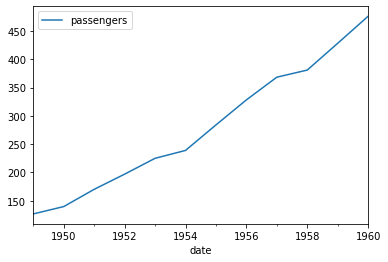

In [208]:
flights.groupby(pd.Grouper(freq = 'Y')).agg({'passengers' : 'mean'}).plot()

In [209]:
flights.resample('y').mean()      # like groupby but with dates (by year)

,year,passengers
date,,
1949-12-31,1949.0,126.666667
1950-12-31,1950.0,139.666667
1951-12-31,1951.0,170.166667
1952-12-31,1952.0,197.000000
1953-12-31,1953.0,225.000000
1954-12-31,1954.0,238.916667
1955-12-31,1955.0,284.000000
1956-12-31,1956.0,328.250000
1957-12-31,1957.0,368.416667


In [210]:
 flights.index.day_name()

Index(['Saturday', 'Tuesday', 'Tuesday', 'Friday', 'Sunday', 'Wednesday',
       'Friday', 'Monday', 'Thursday', 'Saturday',
       ...
       'Tuesday', 'Friday', 'Sunday', 'Wednesday', 'Friday', 'Monday',
       'Thursday', 'Saturday', 'Tuesday', 'Thursday'],
      dtype='object', name='date', length=144)

In [211]:
flights.resample('y').mean()['passengers'].diff(1)     #diferencia entre 1 o 2 o 3 renglones

date
1949-12-31          NaN
1950-12-31    13.000000
1951-12-31    30.500000
1952-12-31    26.833333
1953-12-31    28.000000
1954-12-31    13.916667
1955-12-31    45.083333
1956-12-31    44.250000
1957-12-31    40.166667
1958-12-31    12.583333
1959-12-31    47.333333
1960-12-31    47.833333
Freq: A-DEC, Name: passengers, dtype: float64

In [212]:
flights['1950-12-31':].head()    #filtered by date

,year,month,passengers
date,,,
1951-01-01,1951,Jan,145
1951-02-01,1951,Feb,150
1951-03-01,1951,Mar,178
1951-04-01,1951,Apr,163
1951-05-01,1951,May,172


In [213]:
flights.reset_index(inplace=True)
flights

,date,year,month,passengers
0,1949-01-01,1949,Jan,112
1,1949-02-01,1949,Feb,118
2,1949-03-01,1949,Mar,132
3,1949-04-01,1949,Apr,129
4,1949-05-01,1949,May,121
...,...,...,...,...
139,1960-08-01,1960,Aug,606
140,1960-09-01,1960,Sep,508
141,1960-10-01,1960,Oct,461
142,1960-11-01,1960,Nov,390


In [215]:
flights['weekday_name'] = flights['date'].dt.day_name()
flights

,date,year,month,passengers,weekday_name
0,1949-01-01,1949,Jan,112,Saturday
1,1949-02-01,1949,Feb,118,Tuesday
2,1949-03-01,1949,Mar,132,Tuesday
3,1949-04-01,1949,Apr,129,Friday
4,1949-05-01,1949,May,121,Sunday
...,...,...,...,...,...
139,1960-08-01,1960,Aug,606,Monday
140,1960-09-01,1960,Sep,508,Thursday
141,1960-10-01,1960,Oct,461,Saturday
142,1960-11-01,1960,Nov,390,Tuesday


In [223]:
flights.groupby('weekday_name').agg({'passengers':['size']})

,passengers
,size
weekday_name,
Friday,21
Monday,19
Saturday,20
Sunday,21
Thursday,21
Tuesday,23
Wednesday,19


<AxesSubplot:xlabel='weekday_name'>

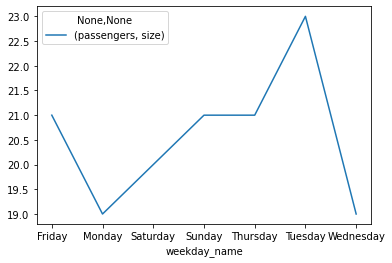

In [222]:
flights.groupby('weekday_name').agg({'passengers':['size']}).plot()

# Convert into categories

In [224]:
flights['weekday_name'] = pd.Categorical(flights['weekday_name'],
categories = ["Monday","Tuesday", "Wednesday", " Thursday", "Friday" , " Saturday", "Sunday"],
ordered = True)

In [226]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          144 non-null    datetime64[ns]
 1   year          144 non-null    int64         
 2   month         144 non-null    category      
 3   passengers    144 non-null    int64         
 4   weekday_name  103 non-null    category      
dtypes: category(2), datetime64[ns](1), int64(2)
memory usage: 4.5 KB


In [227]:
flights.groupby('weekday_name').size()

weekday_name
Monday       19
Tuesday      23
Wednesday    19
 Thursday     0
Friday       21
 Saturday     0
Sunday       21
dtype: int64

<AxesSubplot:xlabel='weekday_name'>

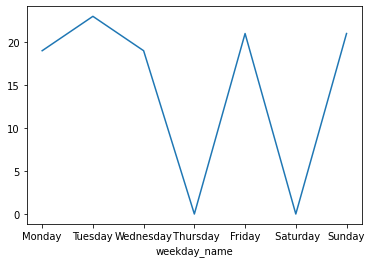

In [228]:
flights.groupby('weekday_name').size().plot()

## Exploring the data

As we go through the dataset, knowing some functions that `pandas` provide us to make our lives easier is crucial. Here, we want to identify the types of data in our dataset, if we have nulls in our dataset, etc. Some functions that can help us for this include:

```python
df.head()
df.tail()
df.info()
df.shape
df.columns
df.describe()
df.value_counts()
df.unique()
df.nunique()
df.dtype
```

In [ ]:
?titanic.rename

# change the name of just one column

In [254]:
titanic = titanic.rename(columns={'Passenger_Id':'PassengerId'})
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


### Exercise 1:

Using the `sex`, `Age`, and `fare` columns, answer the following questions:

1. How many Men and Women do we have in our dataset?
2. What is the most frequent age in our dataset?
3. What is the most common age for women?
4. What is the most common age for men?
5. What is the most common ticket price?
6. Is the price of the most common ticket the same for men and women?

## Pre-processing our data

Now that we have an idea of what our dataset consists of, let's transform it so that we can display phase. The types of activities we may engage in during **pre-processing** include:

1. **Deleting columns**
2. **Enriching (or Transforming)** a data set, adding newly calculated columns in the indices
3. **Filtering** a subset of the rows or columns of a dataset according to some criteria
4. **Indexing** a dataset
5. **Aggregating** data
6. **Sorting** the rows of a data set according to some criteria
7. **Merging** the data
8. **Pivoting** so that data that was originally laid out vertically is laid out horizontally (increasing the number of columns) or vice versa (increasing the number of rows)

among others.

# drop columns

In [279]:
titanic = pd.read_csv('Data/train.csv')

In [280]:
titanic.drop(['PassengerId','Name','Cabin'] , axis= 1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [281]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

# Null Values

- Keep them.  
- Delete them.  
- Leave a fixec dvalue that differentiates them'.  
- Replace them with a summary statistic (mean, median, mode).  
- Forward or brackward fill (with the next or the previous data).  
- Interpolate.  

In [282]:
print(titanic.shape)
titanic.dropna(inplace = True)    # Also drop the index
print(titanic.shape)
titanic.head(10)

(891, 9)
(712, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
6,0,1,male,54.0,0,0,17463,51.8625,S
7,0,3,male,2.0,3,1,349909,21.0750,S
8,1,3,female,27.0,0,2,347742,11.1333,S
9,1,2,female,14.0,1,0,237736,30.0708,C
10,1,3,female,4.0,1,1,PP 9549,16.7000,S


In [283]:
titanic.reset_index(drop = True, inplace= True)    #  to reset the index
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
5,0,1,male,54.0,0,0,17463,51.8625,S
6,0,3,male,2.0,3,1,349909,21.0750,S
7,1,3,female,27.0,0,2,347742,11.1333,S
8,1,2,female,14.0,1,0,237736,30.0708,C
9,1,3,female,4.0,1,1,PP 9549,16.7000,S


In [284]:
titanic = pd.read_csv('Data/train.csv')

In [285]:
titanic.fillna(-1).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-1,S
5,6,0,3,"Moran, Mr. James",male,-1.0,0,0,330877,8.4583,-1,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,-1,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,-1,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,-1,C


In [289]:
titanic.Age.fillna(titanic.Age.median()).head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

# fills NAs with backfills

In [293]:
titanic.Age.fillna(method = 'backfill').head(10)       # look at the 5th position
# fill with the back data

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    54.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [292]:
titanic.Age.fillna(method = 'ffill').head(10)     #fill with the forward data

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    35.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [297]:
titanic.Age.interpolate(method = 'polynomial',order = 2).head(10)     #method could be either polynomial or lineal

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    56.320363
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

# lambda function

In [300]:
titanic.rename(columns = lambda col:col.lower(),inplace = True)

In [302]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Creating a new DataFrame

In [306]:
titanic = pd.read_csv('Data/train.csv')

In [309]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [310]:
# Validate duplicate tickets
df_tickets = titanic.groupby('Ticket').size().reset_index().rename(columns={0:'count'})
df_tickets.sort_values(by='count',ascending=False)

,Ticket,count
80,1601,7
568,CA. 2343,7
333,347082,7
566,CA 2144,6
337,347088,6
...,...,...
300,345572,1
299,345364,1
298,343276,1
297,343275,1


In [312]:
titanic[titanic.Ticket == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [313]:
# Sort the number of records by tickets
df_tickets.sort_values(by=["count"],ascending=False,inplace=True)
df_tickets.head()

,Ticket,count
80,1601,7
568,CA. 2343,7
333,347082,7
566,CA 2144,6
337,347088,6


In [316]:
titanic = titanic.merge(df_tickets, left_on= 'Ticket', right_on = 'Ticket', how= 'left')
titanic.shape

(891, 13)

In [317]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


# List comprehension

In [318]:
 titanic['family'] = [1 if count>1 else 0 for count in titanic['count']]

In [319]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,1


In [321]:
# Remember the functions? we are going to create a function that will help us to clean text, in this case the tickets field
def clean_text(string):
    import re
    regex = '[^A-Za-z0-9]+'
    return re.sub(regex, '', string)

titanic['Ticket'] = titanic['Ticket'].apply(clean_text)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A521171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO23101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


### Encoding categorical variables

Sometimes, it is helpful to create a column for each possible category of one of our categorical variables. For this, we use a `pandas` method called `get_dummies()`:

In [323]:
titanic['sexDummies'] = titanic['Sex']
titanic = pd.get_dummies(titanic, columns = ['sexDummies'], prefix = ['D'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,count,family,D_female,D_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A521171,7.2500,NaN,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO23101282,7.9250,NaN,S,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1


### Exercise 2:

1. Group the data set by gender (`sex`) and calculate the average age (`age`).
2. Group the data set by the family column (`family`) and count the number of records per group.
3. Of the families, how many survived and how many did not?